In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pathlib import Path
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline





titanic = pd.read_csv(Path("datasets/train.csv"))

titanic.head()  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data is imported. Now we explore the data more indepth. NOTE: sibsp =	# of siblings / spouses aboard the Titanic;	
                                                              parch =	# of parents / children aboard the Titanic;	


Clean Data


In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We must somehow will out the missing values. There are mulitple ways. Obvisouly with this amount of data we wont be dropping any collumns, because it can contain usefull information. Instead of it we will try to predict the 


In [4]:
#creating a dataset without missing age, and dropping cabin column and selecting only integer and float columns
titanic_clean = titanic.drop(columns=['Cabin'])
titanic_clean = titanic_clean.dropna()
titanic_clean = titanic_clean.select_dtypes(include=['int64', 'float64'])
titanic_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [5]:
titanic_clean.corr()['Age']

PassengerId    0.033681
Survived      -0.082446
Pclass        -0.365902
Age            1.000000
SibSp         -0.307351
Parch         -0.187896
Fare           0.093143
Name: Age, dtype: float64

I was hoping that fare or Pcalls could give me some good correlation on which i could make a model for guessing age, not the case. Now we will use simple inputer to input the values (the correlation between survived and age doesnt seem to be that big, so using median strategy should do the job)


In [6]:
#creating two ways to impute missing values in age column

imputer = SimpleImputer(strategy='median')
imputer2 = KNNImputer(n_neighbors=5)


titanic_onlynum = titanic.select_dtypes(include=[np.number])
titanic_onlynum2 = titanic_onlynum[['Age']]
titanic_onlynum = titanic_onlynum2
age_transformed1 = imputer.fit_transform(titanic_onlynum[['Age']])
age_transformed2 = imputer2.fit_transform(titanic_onlynum2[['Age']])

age_transformed2





array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.69911765],
       [31.        ],
       [29.69911765],
       [35.        ],
       [34.        ],
       [15.        ],
       [28.        ],
       [ 8.        ],
       [38.        ],
       [29.69911765],
       [19.        ],
       [29.69911765],
       [29.69911765],
       [40.        ],
       [29.69911765],
       [29.69911765],
       [66.        ],
       [28.        ],
       [42.        ],
       [29.69911765],
       [21.        ],
       [18.        ],
       [14.        ],
       [40.        ],
       [27.        ],
       [29.69911765],
       [ 3.        ],
       [19.        ],
       [29

Fixing another missing vallues - Embarked. Embarked is interesting, but just two values, we will add a random fourth value, cause we will onehotencode it anyways.


In [7]:
titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [8]:
titanic['Embarked'].fillna('S', inplace=True)
titanic.isnull().sum()  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
titanic['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [10]:
titanic.drop('Cabin', axis=1, inplace=True)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

It is questionable if cabin in this case can give us some usefull insight and improve our data. I believe that for now, we should just drop the collumn.

Titanic now does not have any missing values, we wil import out values from age that we have gotten.

In [11]:
titanic1 = titanic.copy()
titanic1['Age'].fillna(pd.Series(age_transformed1[:, 0]), inplace=True)
titanic2 = titanic.copy()
titanic2['Age'].fillna(pd.Series(age_transformed2[:, 0]), inplace=True)
titanic1.head()
titanic2.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
titanic2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

now the idea is to make an collumn which will determinate if the person is alone on the board or not. In reality, not everyone is alone, they can be with their friends etc. however this metric should definetly improve the module performance, we will try with and without it. 




In [13]:
titanic1['isAlone'] = 0
for index, row in titanic1.iterrows():
    if row['SibSp'] + row['Parch'] == 0:
        titanic1.at[index, 'isAlone'] = 1
titanic2['isAlone'] = titanic1['isAlone'].copy()
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [14]:
titanic1_onlynum = titanic1.select_dtypes(include=[np.number])
titanic1_onlynum.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,isAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [15]:

custom_bin_edges = [0, 10, 60, 200, 520]
bin_labels = ['1', '2', '3', '4']

custom_bin_edges2 = [0, 15, 20, 30, 50, 120]
bin_labels2 = ['1', '2', '3', '4', '5']

titanic1['fare_bins'] = pd.cut(titanic1['Fare'], bins=custom_bin_edges, labels=bin_labels, include_lowest=True)
titanic2['fare_bins'] = pd.cut(titanic2['Fare'], bins=custom_bin_edges, labels=bin_labels, include_lowest=True)
titanic1['age_bins'] = pd.cut(titanic1['Age'], bins=custom_bin_edges2, labels=bin_labels2, include_lowest=True)
titanic2['age_bins'] = pd.cut(titanic2['Age'], bins=custom_bin_edges2, labels=bin_labels2, include_lowest=True)






titanic2.sample(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,isAlone,fare_bins,age_bins
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.000000,1,0,36973,83.4750,S,0,3,4
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,29.699118,0,0,W./C. 6609,7.5500,S,1,1,3
407,408,1,2,"Richards, Master. William Rowe",male,3.000000,1,1,29106,18.7500,S,0,2,1
572,573,1,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.000000,0,0,PC 17474,26.3875,S,1,2,4
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.000000,0,0,695,5.0000,S,1,1,4
16,17,0,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,Q,0,2,1
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000000,0,0,PC 17754,34.6542,C,1,2,5
674,675,0,2,"Watson, Mr. Ennis Hastings",male,29.699118,0,0,239856,0.0000,S,1,1,3
808,809,0,2,"Meyer, Mr. August",male,39.000000,0,0,248723,13.0000,S,1,2,4
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.000000,1,1,230080,26.0000,S,0,2,1


In [16]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

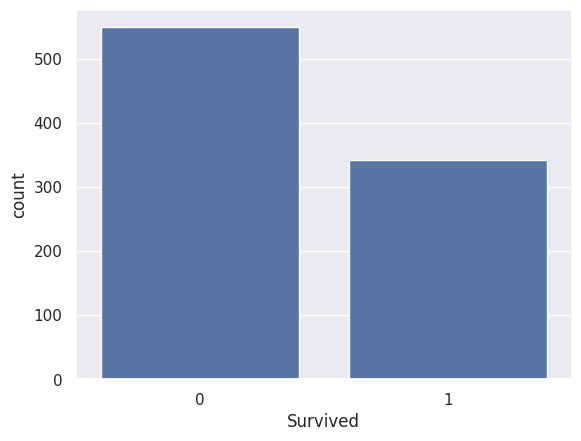

In [17]:
sns.countplot(x='Survived', data=titanic1)


<Axes: xlabel='Sex', ylabel='count'>

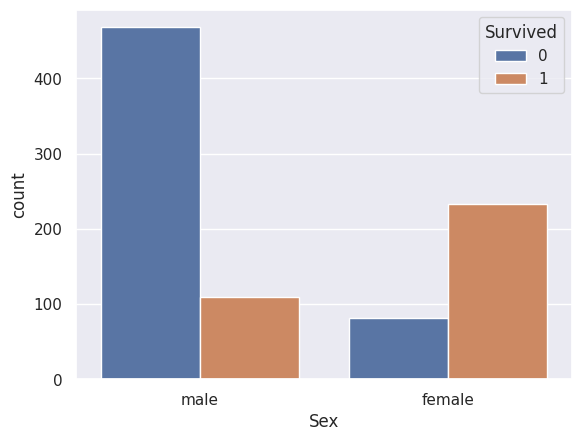

In [18]:
sns.countplot(x='Sex', hue='Survived', data=titanic1)

Female survived more, i was just curious what was happening there 

In [19]:
titanic1['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [20]:
titanic1['Sex'] = titanic1['Sex'].apply(lambda x: 0 if x.lower() == 'male' else 1)
titanic2['Sex'] = titanic2['Sex'].apply(lambda x: 0 if x.lower() == 'male' else 1)



In [21]:
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,isAlone,fare_bins,age_bins
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0,3,4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0,2,4
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1,1,4


In [22]:

for index, row in titanic1.iterrows():
    if 'Mistress' in row['Name'] or 'Master' in row['Name'] or 'Miss' in row['Name'] or 'Ms' in row['Name']:        
        titanic1.at[index, 'hasTitle'] = 1
        if titanic1.at[index, 'Age'] <= 25:
            titanic1.at[index, 'Age'] = 28
    else:
        titanic1.at[index, 'hasTitle'] = 0
for index, row in titanic2.iterrows():
    if 'Mistress' in row['Name'] or 'Master' in row['Name'] or 'Miss' in row['Name'] or 'Ms' in row['Name']:        
        titanic2.at[index, 'hasTitle'] = 1
        if titanic2.at[index, 'Age'] <= 25:
            titanic2.at[index, 'Age'] = 28
    else:
        titanic2.at[index, 'hasTitle'] = 0        
titanic1['hasTitle'] = titanic1['hasTitle'].astype(int)

titanic2.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,isAlone,fare_bins,age_bins,hasTitle
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,1,3,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0,3,4,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,3,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0,2,4,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1,1,4,0.0


I believe that ticket, passengerID and Name, for now works only as Identifiers, they do not add real value for the data. If i knew that some parts of tickets means some information, i could try to target it, however i have not been given the information and i cant confirm it. Lets see how many people had in their ticket word PARIS and how many of them died.

In [23]:
buffer = 0
died = 0
for index, row in titanic2.iterrows():
    if 'Paris' in row['Ticket']:        
        buffer += 1
        if titanic2.at[index, 'Survived'] == 0:
            died += 1
print(buffer)
print(died)

4
2


In [24]:
buffer = 0
died = 0
for index, row in titanic2.iterrows():
    if 'CA' in row['Ticket']:
        buffer += 1
        if titanic2.at[index, 'Survived'] == 0:
            died += 1
print(buffer)
print(died)

14
13


Lets do this for other common ticket parts

In [25]:
buffer = 0
died = 0
for index, row in titanic2.iterrows():
    if 'A/5' in row['Ticket']:        
        buffer += 1
        if titanic2.at[index, 'Survived'] == 0:
            died += 1
print(buffer)
print(died)

17
15


In [26]:
titanic2.sample(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,isAlone,fare_bins,age_bins,hasTitle
185,186,0,1,"Rood, Mr. Hugh Roscoe",0,29.699118,0,0,113767,50.0000,S,1,2,3,0.0
817,818,0,2,"Mallet, Mr. Albert",0,31.000000,1,1,S.C./PARIS 2079,37.0042,C,0,2,4,0.0
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",0,28.000000,0,0,110564,26.5500,S,1,2,3,0.0
602,603,0,1,"Harrington, Mr. Charles H",0,29.699118,0,0,113796,42.4000,S,1,2,3,0.0
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",1,28.000000,2,2,W./C. 6608,34.3750,S,0,2,3,1.0
730,731,1,1,"Allen, Miss. Elisabeth Walton",1,29.000000,0,0,24160,211.3375,S,1,4,3,1.0
441,442,0,3,"Hampe, Mr. Leon",0,20.000000,0,0,345769,9.5000,S,1,1,2,0.0
733,734,0,2,"Berriman, Mr. William John",0,23.000000,0,0,28425,13.0000,S,1,2,3,0.0
267,268,1,3,"Persson, Mr. Ernst Ulrik",0,25.000000,1,0,347083,7.7750,S,0,1,3,0.0
848,849,0,2,"Harper, Rev. John",0,28.000000,0,1,248727,33.0000,S,0,2,3,0.0


now we can determinate, that there might be tickets, that can contain some probability value. Based on this exploration, we will create another call ['goodTicket']

In [27]:
#counter
class TicketContainer: 
    def __init__(self):
        self.has = 0
        self.died = 0
        self.goodbad = 0

ticket_containers = {
    'A/5': TicketContainer(),
    'A/4': TicketContainer(),
    'CA': TicketContainer(),
    'PP': TicketContainer(),
    'PC': TicketContainer(),
    'LINE': TicketContainer(),
    'W.E.P': TicketContainer(),
    'SOTON': TicketContainer(),
    'F.C.C.': TicketContainer(),
    'S.C': TicketContainer(),
    'W.': TicketContainer(),
    'STON': TicketContainer(),
    'PARIS': TicketContainer(),
    'C.A': TicketContainer(),
    'S.O': TicketContainer(),
    'Paris': TicketContainer(),
}
for index, row in titanic2.iterrows():
    for prefix, container in ticket_containers.items():
        if prefix in row['Ticket']:
            container.has += 1
            if row['Survived'] == 0:
                container.died += 1
            break
bad_tickets = []    
good_tickets = []
def isTicketBad(prefix):
    if prefix in ticket_containers and ticket_containers[prefix].has >= 4 and ticket_containers[prefix].died / ticket_containers[prefix].has > 0.65:
        bad_tickets.append(prefix)
        return True
    elif prefix in ticket_containers and ticket_containers[prefix].has >= 4 and ticket_containers[prefix].died / ticket_containers[prefix].has > 0.:
        good_tickets.append(prefix)
        return True
    return False

In [28]:
for i in ticket_containers:
    isTicketBad(i)
    
print(good_tickets)

['PP', 'PC', 'F.C.C.', 'STON', 'PARIS', 'C.A', 'Paris']


In [29]:
print(bad_tickets)

['A/5', 'A/4', 'CA', 'LINE', 'SOTON', 'W.', 'S.O']


In [30]:
for index, row in titanic2.iterrows():
    for prefix in bad_tickets:
        if prefix in row['Ticket']:
            titanic2.at[index, 'badTicket'] = '1'
            break
        else:
            titanic2.at[index, 'badTicket'] = '0'
    for prefix in good_tickets:
        if prefix in row['Ticket']:
            titanic2.at[index, 'badTicket'] = '-1'
            break
        else:
            titanic2.at[index, 'badTicket'] = '0'

In [31]:
titanic2['badTicket'] = titanic2['badTicket'].astype(int)
titanic2_onlynum = titanic2.select_dtypes(include=[float, int])
titanic2_onlynum.corr()['Survived']


titanic1['badTicket'] = titanic2['badTicket'].copy()
print(titanic1.columns)
print(titanic2.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'isAlone', 'fare_bins',
       'age_bins', 'hasTitle', 'badTicket'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'isAlone', 'fare_bins',
       'age_bins', 'hasTitle', 'badTicket'],
      dtype='object')


In [32]:
titanic1['badTicket'] = titanic2['badTicket'].copy()
print(titanic1.columns)
print(titanic2.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'isAlone', 'fare_bins',
       'age_bins', 'hasTitle', 'badTicket'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'isAlone', 'fare_bins',
       'age_bins', 'hasTitle', 'badTicket'],
      dtype='object')


In [33]:
titanic1.drop(columns=['Name', 'Ticket', 'Fare', 'Age', 'SibSp', 'Parch'], inplace=True)
titanic2.drop(columns=['Name', 'Ticket', 'Fare', 'Age', 'SibSp', 'Parch'], inplace=True)

In [34]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()

# Extract the 'Embarked' column and reshape it to a 2D array
embarked_column = titanic1[['Embarked']]
feature_array = onehot_encoder.fit_transform(embarked_column).toarray()

# Get the feature labels/categories
feature_labels = onehot_encoder.get_feature_names_out(['Embarked'])

# Create a new DataFrame with one-hot encoded columns
onehot_encoded_df = pd.DataFrame(feature_array, columns=feature_labels)

# Concatenate the new DataFrame with the original 'titanic1'
titanic1 = pd.concat([titanic1, onehot_encoded_df], axis=1)
titanic2 = pd.concat([titanic2, onehot_encoded_df], axis=1)

titanic1.drop(columns=['Embarked'], inplace=True)
titanic2.drop(columns=['Embarked'], inplace=True)

In [35]:
titanic1.head()

,PassengerId,Survived,Pclass,Sex,isAlone,fare_bins,age_bins,hasTitle,badTicket,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,0,1,3,0,0,0.0,0.0,1.0
1,2,1,1,1,0,3,4,0,-1,1.0,0.0,0.0
2,3,1,3,1,1,1,3,1,-1,0.0,0.0,1.0
3,4,1,1,1,0,2,4,0,0,0.0,0.0,1.0
4,5,0,3,0,1,1,4,0,0,0.0,0.0,1.0


In [36]:
from sklearn.preprocessing import StandardScaler
temp = titanic1['Survived'].copy()
titanic1.drop(columns=['Survived'], inplace=True)
scaler = StandardScaler()

titanic1 = pd.DataFrame(scaler.fit_transform(titanic1), columns=titanic1.columns)
titanic2 = pd.DataFrame(scaler.fit_transform(titanic2), columns=titanic2.columns)
titanic1['Survived'] = temp
titanic2['Survived'] = temp
titanic1.head()

,PassengerId,Pclass,Sex,isAlone,fare_bins,age_bins,hasTitle,badTicket,Embarked_C,Embarked_Q,Embarked_S,Survived
0,-1.730108,0.827377,-0.737695,-1.231645,-1.070533,-0.118689,-0.577782,0.411450,-0.482043,-0.307562,0.615838,0
1,-1.726220,-1.566107,1.355574,-1.231645,1.666468,0.869649,-0.577782,-2.430427,2.074505,-0.307562,-1.623803,1
2,-1.722332,0.827377,1.355574,0.811922,-1.070533,-0.118689,1.730756,-2.430427,-0.482043,-0.307562,0.615838,1
3,-1.718444,-1.566107,1.355574,-1.231645,0.297968,0.869649,-0.577782,0.411450,-0.482043,-0.307562,0.615838,1
4,-1.714556,0.827377,-0.737695,0.811922,-1.070533,0.869649,-0.577782,0.411450,-0.482043,-0.307562,0.615838,0


In [37]:
titanic1['Survived'] = titanic1['Survived'].astype('category')
titanic1.to_csv('data_dan_correct.csv')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'Survived' is the target variable
X_train = titanic1.drop(columns=['Survived'])
y_train = titanic1['Survived']

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf_model.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

# Print classification report
print('\nClassification Report:')
print(classification_report(y_valid, y_pred))

Validation Accuracy: 0.8156

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.77      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [38]:


from sklearn.ensemble import GradientBoostingClassifier





# Create and train Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)




y_pred_gb = gb_model.predict(X_valid)




accuracy_gb = accuracy_score(y_valid, y_pred_gb)


print(f'Gradient Boosting Classifier Validation Accuracy: {accuracy_gb:.4f}')


Gradient Boosting Classifier Validation Accuracy: 0.8156


In [39]:
titanic__train = titanic2.copy()

In [40]:
titanic_test = pd.read_csv(Path("datasets/test.csv"))
titanic = titanic_test.copy()


In [41]:
#creating two ways to impute missing values in age column

imputer = SimpleImputer(strategy='median')
imputer2 = KNNImputer(n_neighbors=5)


titanic_onlynum = titanic.select_dtypes(include=[np.number])
titanic_onlynum2 = titanic_onlynum[['Age']]
titanic_onlynum = titanic_onlynum2
age_transformed1 = imputer.fit_transform(titanic_onlynum[['Age']])
age_transformed2 = imputer2.fit_transform(titanic_onlynum2[['Age']])

age_transformed2





array([[34.5       ],
       [47.        ],
       [62.        ],
       [27.        ],
       [22.        ],
       [14.        ],
       [30.        ],
       [26.        ],
       [18.        ],
       [21.        ],
       [30.27259036],
       [46.        ],
       [23.        ],
       [63.        ],
       [47.        ],
       [24.        ],
       [35.        ],
       [21.        ],
       [27.        ],
       [45.        ],
       [55.        ],
       [ 9.        ],
       [30.27259036],
       [21.        ],
       [48.        ],
       [50.        ],
       [22.        ],
       [22.5       ],
       [41.        ],
       [30.27259036],
       [50.        ],
       [24.        ],
       [33.        ],
       [30.27259036],
       [30.        ],
       [18.5       ],
       [30.27259036],
       [21.        ],
       [25.        ],
       [30.27259036],
       [39.        ],
       [30.27259036],
       [41.        ],
       [30.        ],
       [45.        ],
       [25

In [42]:
titanic['Embarked'].fillna('S', inplace=True)
titanic.isnull().sum()  

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
titanic.drop('Cabin', axis=1, inplace=True)
titanic.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [44]:
titanic1 = titanic.copy()
titanic1['Age'].fillna(pd.Series(age_transformed1[:, 0]), inplace=True)
titanic2 = titanic.copy()
titanic2['Age'].fillna(pd.Series(age_transformed2[:, 0]), inplace=True)
titanic1.head()
titanic2.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [45]:
titanic1['Fare'].fillna(titanic1['Fare'].mean(), inplace=True)
titanic2['Fare'].fillna(titanic2['Fare'].mean(), inplace=True)

In [46]:
titanic1['isAlone'] = 0
for index, row in titanic1.iterrows():
    if row['SibSp'] + row['Parch'] == 0:
        titanic1.at[index, 'isAlone'] = 1
titanic2['isAlone'] = titanic1['isAlone'].copy()
titanic1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,isAlone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [47]:
titanic1_onlynum = titanic1.select_dtypes(include=[np.number])
titanic1_onlynum.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,isAlone
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.627188,0.605263
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.840500,0.489380
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,1.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [48]:

custom_bin_edges = [0, 10, 60, 200, 520]
bin_labels = ['1', '2', '3', '4']

custom_bin_edges2 = [0, 15, 20, 30, 50, 120]
bin_labels2 = ['1', '2', '3', '4', '5']

titanic1['fare_bins'] = pd.cut(titanic1['Fare'], bins=custom_bin_edges, labels=bin_labels, include_lowest=True)
titanic2['fare_bins'] = pd.cut(titanic2['Fare'], bins=custom_bin_edges, labels=bin_labels, include_lowest=True)
titanic1['age_bins'] = pd.cut(titanic1['Age'], bins=custom_bin_edges2, labels=bin_labels2, include_lowest=True)
titanic2['age_bins'] = pd.cut(titanic2['Age'], bins=custom_bin_edges2, labels=bin_labels2, include_lowest=True)






titanic2.sample(30)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,isAlone,fare_bins,age_bins
315,1207,3,"Hagardon, Miss. Kate",female,17.00000,0,0,AQ/3. 30631,7.7333,Q,1,1,2
147,1039,3,"Davies, Mr. Evan",male,22.00000,0,0,SC/A4 23568,8.0500,S,1,1,3
368,1260,1,"Gibson, Mrs. Leonard (Pauline C Boeson)",female,45.00000,0,1,112378,59.4000,C,0,2,4
365,1257,3,"Sage, Mrs. John (Annie Bullen)",female,30.27259,1,9,CA. 2343,69.5500,S,0,3,4
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S,0,2,3
211,1103,3,"Finoli, Mr. Luigi",male,30.27259,0,0,SOTON/O.Q. 3101308,7.0500,S,1,1,4
117,1009,3,"Sandstrom, Miss. Beatrice Irene",female,1.00000,1,1,PP 9549,16.7000,S,0,2,1
154,1046,3,"Asplund, Master. Filip Oscar",male,13.00000,4,2,347077,31.3875,S,0,2,1
344,1236,3,"van Billiard, Master. James William",male,30.27259,1,1,A/5. 851,14.5000,S,0,2,4
174,1066,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.00000,1,5,347077,31.3875,S,0,2,4


In [49]:
titanic1['Sex'] = titanic1['Sex'].apply(lambda x: 0 if x.lower() == 'male' else 1)
titanic2['Sex'] = titanic2['Sex'].apply(lambda x: 0 if x.lower() == 'male' else 1)



In [50]:

for index, row in titanic1.iterrows():
    if 'Mistress' in row['Name'] or 'Master' in row['Name'] or 'Miss' in row['Name'] or 'Ms' in row['Name']:        
        titanic1.at[index, 'hasTitle'] = 1
        if titanic1.at[index, 'Age'] <= 25:
            titanic1.at[index, 'Age'] = 28
    else:
        titanic1.at[index, 'hasTitle'] = 0
for index, row in titanic2.iterrows():
    if 'Mistress' in row['Name'] or 'Master' in row['Name'] or 'Miss' in row['Name'] or 'Ms' in row['Name']:        
        titanic2.at[index, 'hasTitle'] = 1
        if titanic2.at[index, 'Age'] <= 25:
            titanic2.at[index, 'Age'] = 28
    else:
        titanic2.at[index, 'hasTitle'] = 0        
titanic1['hasTitle'] = titanic1['hasTitle'].astype(int)

titanic2.head()



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,isAlone,fare_bins,age_bins,hasTitle
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q,1,1,4,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S,0,1,4,0.0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q,1,1,5,0.0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S,1,1,3,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S,0,2,3,0.0


In [51]:

bad_tickets = ['A/5', 'A/4', 'CA', 'LINE', 'SOTON', 'W.', 'S.O']    
good_tickets = ['PP', 'PC', 'F.C.C.', 'STON', 'PARIS', 'C.A', 'Paris']


In [52]:
for index, row in titanic2.iterrows():
    for prefix in bad_tickets:
        if prefix in row['Ticket']:
            titanic2.at[index, 'badTicket'] = '1'
            break
        else:
            titanic2.at[index, 'badTicket'] = '0'
    for prefix in good_tickets:
        if prefix in row['Ticket']:
            titanic2.at[index, 'badTicket'] = '-1'
            break
        else:
            titanic2.at[index, 'badTicket'] = '0'

In [53]:
titanic2['badTicket'] = titanic2['badTicket'].astype(int)
titanic2_onlynum = titanic2.select_dtypes(include=[float, int])



titanic1['badTicket'] = titanic2['badTicket'].copy()
print(titanic1.columns)
print(titanic2.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'isAlone', 'fare_bins', 'age_bins',
       'hasTitle', 'badTicket'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'isAlone', 'fare_bins', 'age_bins',
       'hasTitle', 'badTicket'],
      dtype='object')


In [54]:
titanic1['badTicket'] = titanic2['badTicket'].copy()
print(titanic1.columns)
print(titanic2.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'isAlone', 'fare_bins', 'age_bins',
       'hasTitle', 'badTicket'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'isAlone', 'fare_bins', 'age_bins',
       'hasTitle', 'badTicket'],
      dtype='object')


In [55]:
titanic1.drop(columns=['Name', 'Ticket', 'Fare', 'Age', 'SibSp', 'Parch'], inplace=True)
titanic2.drop(columns=['Name', 'Ticket', 'Fare', 'Age', 'SibSp', 'Parch'], inplace=True)

In [56]:
onehot_encoder = OneHotEncoder()

# Extract the 'Embarked' column and reshape it to a 2D array
embarked_column = titanic1[['Embarked']]
feature_array = onehot_encoder.fit_transform(embarked_column).toarray()

# Get the feature labels/categories
feature_labels = onehot_encoder.get_feature_names_out(['Embarked'])

# Create a new DataFrame with one-hot encoded columns
onehot_encoded_df = pd.DataFrame(feature_array, columns=feature_labels)

# Concatenate the new DataFrame with the original 'titanic1'
titanic1 = pd.concat([titanic1, onehot_encoded_df], axis=1)
titanic2 = pd.concat([titanic2, onehot_encoded_df], axis=1)

titanic1.drop(columns=['Embarked'], inplace=True)
titanic2.drop(columns=['Embarked'], inplace=True)

In [57]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

titanic1 = pd.DataFrame(scaler.fit_transform(titanic1), columns=titanic1.columns)
titanic2 = pd.DataFrame(scaler.fit_transform(titanic2), columns=titanic2.columns)

titanic1.head()

,PassengerId,Pclass,Sex,isAlone,fare_bins,age_bins,hasTitle,badTicket,Embarked_C,Embarked_Q,Embarked_S
0,-1.727912,0.873482,-0.755929,0.807573,-1.045397,0.892301,-0.560772,0.440779,-0.568142,2.843757,-1.350676
1,-1.719625,0.873482,1.322876,-1.238278,-1.045397,0.892301,-0.560772,0.440779,-0.568142,-0.351647,0.740370
2,-1.711337,-0.315819,-0.755929,0.807573,-1.045397,1.940002,-0.560772,0.440779,-0.568142,2.843757,-1.350676
3,-1.703050,0.873482,-0.755929,0.807573,-1.045397,-0.155401,-0.560772,0.440779,-0.568142,-0.351647,0.740370
4,-1.694763,0.873482,1.322876,-1.238278,0.228585,-0.155401,-0.560772,0.440779,-0.568142,-0.351647,0.740370


In [58]:
y_pred_test = gb_model.predict(titanic2)
titanic1.to_csv('data_dan.csv')
predictions_df = pd.DataFrame({'PassengerId': titanic_test['PassengerId'], 'Survived': y_pred_test})
predictions_df.to_csv('submission3.csv', index=False)